<a href="https://colab.research.google.com/github/SatyaA-dev/SatyaAditya_INFO5731_Fall2024/blob/main/Masimukku_SatyaAditya_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd

# Load the dataset
dataset_path = "/content/movie_reviews.csv"
df = pd.read_csv(dataset_path)

# Assuming the reviews are in a column named 'review'
dataset = df['review'].dropna().tolist()

# Helper function to tokenize text into words
def tokenize(text):
    text = text.lower()
    words = text.split()
    return words

# Function to generate n-grams
def generate_ngrams(words, n):
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(tuple(words[i:i + n]))
    return ngrams

# Function to count the frequency of all n-grams
def count_ngrams(dataset, n):
    ngram_counts = {}
    for review in dataset:
        words = tokenize(review)
        ngrams = generate_ngrams(words, n)
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(unigram_counts, bigram_counts):
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        if w2 in unigram_counts:
            probability = count / unigram_counts[w2]
            bigram_probabilities[bigram] = probability
    return bigram_probabilities

# Function to extract noun phrases (simplified approach)
def extract_noun_phrases(text):
    words = tokenize(text)
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i].istitle() and words[i + 1].istitle():  # Check for consecutive capitalized words
            noun_phrases.append(f"{words[i]} {words[i + 1]}")
    return noun_phrases

# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(dataset):
    noun_phrase_counts = {}
    for review in dataset:
        noun_phrases = extract_noun_phrases(review)
        for phrase in noun_phrases:
            if phrase in noun_phrase_counts:
                noun_phrase_counts[phrase] += 1
            else:
                noun_phrase_counts[phrase] = 1

    if not noun_phrase_counts:  # Check if noun_phrase_counts is empty
        return {}

    max_frequency = max(noun_phrase_counts.values())
    relative_probabilities = {}
    for phrase, count in noun_phrase_counts.items():
        relative_probabilities[phrase] = count / max_frequency

    return relative_probabilities

# Main analysis
unigram_counts = count_ngrams(dataset, 1)
bigram_counts = count_ngrams(dataset, 2)
trigram_counts = count_ngrams(dataset, 3)

bigram_probabilities = calculate_bigram_probabilities(unigram_counts, bigram_counts)
relative_probabilities = calculate_relative_probabilities(dataset)

# Output the results
print("Trigram Counts:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

print("\nBigram Probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability:.2f}")

print("\nRelative Probabilities of Noun Phrases:")
if relative_probabilities:
    for phrase, probability in relative_probabilities.items():
        print(f"{phrase}: {probability:.2f}")
else:
    print("No noun phrases found.")


Streaming output truncated to the last 5000 lines.
('the', 'first', 'atomic'): 32
('first', 'atomic', 'bomb)'): 16
('atomic', 'bomb)', 'is'): 16
('bomb)', 'is', 'the'): 16
('is', 'the', 'best'): 32
('the', 'best', 'part'): 16
('best', 'part', 'of'): 16
('part', 'of', 'the'): 32
('of', 'the', "movie.oppenheimer's"): 16
('the', "movie.oppenheimer's", 'shaken'): 16
("movie.oppenheimer's", 'shaken', 'and'): 16
('shaken', 'and', 'stirred'): 16
('and', 'stirred', 'speech'): 16
('stirred', 'speech', 'after'): 16
('speech', 'after', 'the'): 16
('after', 'the', 'trinity'): 16
('the', 'trinity', 'test'): 16
('trinity', 'test', 'is'): 16
('test', 'is', 'arguably'): 16
('is', 'arguably', 'the'): 32
('arguably', 'the', 'most'): 16
('the', 'most', 'engrossing'): 16
('most', 'engrossing', 'and'): 16
('engrossing', 'and', 'immersive'): 16
('and', 'immersive', 'movie-making'): 16
('immersive', 'movie-making', 'of'): 16
('movie-making', 'of', 'this'): 16
('of', 'this', 'summer.great'): 16
('this', 'summ

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [7]:
import math
import pandas as pd

# Load the dataset
dataset_path = "/content/movie_reviews.csv"
df = pd.read_csv(dataset_path)

# Assuming the reviews are in a column named 'review'
dataset = df['review'].dropna().tolist()

# Helper function to tokenize and clean text
def tokenize(text):
    text = text.lower()
    words = text.split()
    return words

# Function to calculate term frequency (TF)
def calculate_tf(doc):
    tf = {}
    words = tokenize(doc)
    for word in words:
        tf[word] = tf.get(word, 0) + 1
    # Normalize TF values
    for word in tf:
        tf[word] /= len(words)
    return tf

# Function to calculate document frequency (DF)
def calculate_df(dataset):
    df = {}
    total_docs = len(dataset)
    for doc in dataset:
        words = set(tokenize(doc))
        for word in words:
            df[word] = df.get(word, 0) + 1
    return df, total_docs

# Function to calculate TF-IDF for each document
def calculate_tfidf(dataset):
    tfidf_matrix = []
    df, total_docs = calculate_df(dataset)
    idf = {word: math.log(total_docs / df[word]) for word in df}

    for doc in dataset:
        tf = calculate_tf(doc)
        tfidf = {word: tf[word] * idf[word] for word in tf}
        tfidf_matrix.append(tfidf)

    return tfidf_matrix, idf

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[word] * vec2.get(word, 0) for word in vec1)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vec1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on a query
def rank_documents(query, dataset, tfidf_matrix, idf):
    query_tf = calculate_tf(query)
    query_tfidf = {word: query_tf[word] * idf.get(word, 0) for word in query_tf}

    similarities = []
    for index, doc_tfidf in enumerate(tfidf_matrix):
        similarity = cosine_similarity(query_tfidf, doc_tfidf)
        similarities.append((index, similarity))

    # Sort documents by similarity score in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities

# Main program
tfidf_matrix, idf = calculate_tfidf(dataset)
query = "An outstanding movie with a haunting performance and best character development"
ranked_documents = rank_documents(query, dataset, tfidf_matrix, idf)

# Output the results
print("Ranked Documents (from most to least relevant):")
for index, similarity in ranked_documents:
    print(f"Document {index + 1}: {dataset[index]} (Similarity: {similarity:.2f})")


Ranked Documents (from most to least relevant):
Document 20: At its core Oppenheimer is a technical masterpiece. The haunting score by Ludwig Göransson is one of the film's most profound highlights. The score acts as its own character in how it builds and arcs throughout the film and peaks during arguably the best moment, the bomb drop. Paired with an aggressive and bold sound design that transports you into the screen, both sound aspects make this film truly remarkable.There are no faults in the incredible acting of the monumental cast in Oppenheimer. Murphy plays Oppenheimer in a way that enables the audience to feel the gravity of his situation and the historical repercussions that follow. However, Robert Downey Jr., who plays Lewis Strauss, is arguably the best the Oppenheimer cast brings. Downey Jr perfectly portrays the slow spiral and eventual downfall of his character.The film shines when it shifts into a more psychological element focusing on Oppenheimer and the impact of his 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [8]:
pip install gensim


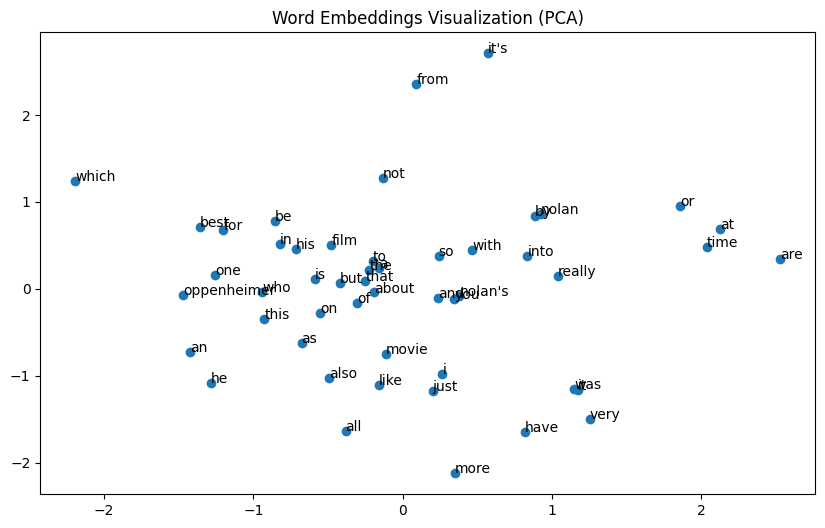

In [9]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
dataset_path = "/content/movie_reviews.csv"
df = pd.read_csv(dataset_path)

# Assuming the reviews are in a column named 'review'
dataset = df['review'].dropna().tolist()

# Helper function to tokenize and clean text
def tokenize(text):
    text = text.lower().split()
    return text

# Tokenize all documents
tokenized_dataset = [tokenize(review) for review in dataset]

# Train a Word2Vec model
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=embedding_dim, window=5, min_count=2, workers=4, sg=1)

# Save the model (optional)
word2vec_model.save("word2vec_model.model")

# Visualize the word embeddings using PCA
def plot_word_embeddings(model, num_words=50):
    words = list(model.wv.index_to_key)[:num_words]  # Get the first 'num_words' words
    word_vectors = [model.wv[word] for word in words]

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (result[i, 0], result[i, 1]))
    plt.title("Word Embeddings Visualization (PCA)")
    plt.show()

# Plot the word embeddings
plot_word_embeddings(word2vec_model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/SatyaA-dev/SatyaAditya_INFO5731_Fall2024/blob/main/Data_Evaluated.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# The assignment was really exciting and I got to learn a lot. The work related to the data really helped me learn a lot of things.